In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [10]:
combined = pd.read_csv('/Users/sharanyasenthil/Downloads/Dataset.csv')

In [11]:
combined.describe()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,1.552210e+06,1.552210e+06,1.398811e+06,1.349474e+06,525226.000000,1.325945e+06,1.358940e+06,1.065656e+06,1.313875e+06,57636.000000,...,10242.000000,92209.000000,1.552210e+06,1.552210e+06,940250.000000,940250.000000,1.552202e+06,1.552210e+06,1.552210e+06,1.552210e+06
mean,2.549274e+01,2.549274e+01,8.458144e+01,9.719395e+01,36.977228,1.237505e+02,8.240010e+01,6.383056e+01,1.872650e+01,32.957657,...,287.385706,196.013911,6.200947e+01,5.592690e-01,0.496571,0.503429,-5.612512e+01,2.699499e+01,1.798468e-02,5.920148e+04
std,2.888256e+01,2.888256e+01,1.732524e+01,2.936924e+00,0.770014,2.323156e+01,1.634175e+01,1.395601e+01,5.098194e+00,7.951662,...,153.002908,103.635366,1.638622e+01,4.964749e-01,0.499989,0.499989,1.622569e+02,2.900542e+01,1.328956e-01,5.024819e+04
min,0.000000e+00,0.000000e+00,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,10.000000,...,34.000000,1.000000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,9.000000e+00,9.000000e+00,7.200000e+01,9.600000e+01,36.500000,1.070000e+02,7.100000e+01,5.400000e+01,1.500000e+01,28.000000,...,184.000000,126.000000,5.168000e+01,0.000000e+00,0.000000,0.000000,-4.705000e+01,1.100000e+01,0.000000e+00,9.990000e+03
50%,1.900000e+01,1.900000e+01,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,6.200000e+01,1.800000e+01,33.000000,...,250.000000,181.000000,6.400000e+01,1.000000e+00,0.000000,1.000000,-6.030000e+00,2.100000e+01,0.000000e+00,1.996500e+04
75%,3.300000e+01,3.300000e+01,9.550000e+01,9.950000e+01,37.500000,1.380000e+02,9.200000e+01,7.200000e+01,2.150000e+01,38.000000,...,349.000000,244.000000,7.400000e+01,1.000000e+00,1.000000,1.000000,-4.000000e-02,3.400000e+01,0.000000e+00,1.098780e+05
max,3.350000e+02,3.350000e+02,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,100.000000,...,1760.000000,2322.000000,1.000000e+02,1.000000e+00,1.000000,1.000000,2.399000e+01,3.360000e+02,1.000000e+00,1.200000e+05


In [12]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

In [13]:
combined.head(10)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
5,5,5,62.0,100.0,NaN,124.0,85.0,61.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,6,0,17072
6,6,6,61.0,100.0,NaN,101.0,75.0,58.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,7,0,17072
7,7,7,68.0,100.0,35.78,142.0,93.5,78.0,16.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,8,0,17072
8,8,8,71.0,100.0,NaN,121.0,74.0,91.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,9,0,17072
9,9,9,69.0,100.0,NaN,120.0,79.0,98.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,10,0,17072


In [17]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 HR                   153399
O2Sat                202736
Temp                1026984
SBP                  226265
MAP                  193270
DBP                  486554
Resp                 238335
EtCO2               1494574
BaseExcess          1468065
HCO3                1487182
FiO2                1422845
pH                  1444637
PaCO2               1465909
SaO2                1498649
AST                 1527027
BUN                 1445642
Alkalinephos        1527269
Calcium             1460879
Chloride            1481744
Creatinine          1457594
Bilirubin_direct    1549220
Glucose             1286694
Lactate             1510764
Magnesium           1454259
Phosphate           1489909
Potassium           1407685
Bilirubin_total     1529069
TroponinI           1537429
Hct                 1414777
Hgb                 1437619
PTT                 1506511
WBC                 1452763
Fibrinogen          1541968
Platelets           1460001
Unit1                611960
Uni

In [19]:
cols_to_fill_zero = ['Bilirubin_direct', 'TroponinI', 'Fibrinogen']
df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)

In [20]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [21]:
if 'Gender' in df_imputed.columns:
    encoder = LabelEncoder()
    df_imputed['Gender'] = encoder.fit_transform(df_imputed['Gender'])

In [22]:
df_imputed['Age_log'] = np.log1p(df_imputed['Age'])
df_imputed['ICULOS_log'] = np.log1p(df_imputed['ICULOS'])
df_imputed['HospAdmTime_log'] = np.log1p(-df_imputed['HospAdmTime'] + 1)

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
df_imputed.drop(columns=['Age', 'ICULOS', 'HospAdmTime'], inplace=True)

In [24]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error, classification_report
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [41]:
df = pd.read_csv('/Users/sharanyasenthil/Downloads/Dataset.csv')

In [42]:
print(df.head())

   Unnamed: 0  Hour    HR  O2Sat  Temp    SBP   MAP   DBP  Resp  EtCO2  ...  \
0           0     0   NaN    NaN   NaN    NaN   NaN   NaN   NaN    NaN  ...   
1           1     1  65.0  100.0   NaN    NaN  72.0   NaN  16.5    NaN  ...   
2           2     2  78.0  100.0   NaN    NaN  42.5   NaN   NaN    NaN  ...   
3           3     3  73.0  100.0   NaN    NaN   NaN   NaN  17.0    NaN  ...   
4           4     4  70.0  100.0   NaN  129.0  74.0  69.0  14.0    NaN  ...   

   Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  ICULOS  \
0         NaN        NaN  68.54       0    NaN    NaN        -0.02       1   
1         NaN        NaN  68.54       0    NaN    NaN        -0.02       2   
2         NaN        NaN  68.54       0    NaN    NaN        -0.02       3   
3         NaN        NaN  68.54       0    NaN    NaN        -0.02       4   
4         NaN      330.0  68.54       0    NaN    NaN        -0.02       5   

   SepsisLabel  Patient_ID  
0            0       17072 

In [43]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 HR                   153399
O2Sat                202736
Temp                1026984
SBP                  226265
MAP                  193270
DBP                  486554
Resp                 238335
EtCO2               1494574
BaseExcess          1468065
HCO3                1487182
FiO2                1422845
pH                  1444637
PaCO2               1465909
SaO2                1498649
AST                 1527027
BUN                 1445642
Alkalinephos        1527269
Calcium             1460879
Chloride            1481744
Creatinine          1457594
Bilirubin_direct    1549220
Glucose             1286694
Lactate             1510764
Magnesium           1454259
Phosphate           1489909
Potassium           1407685
Bilirubin_total     1529069
TroponinI           1537429
Hct                 1414777
Hgb                 1437619
PTT                 1506511
WBC                 1452763
Fibrinogen          1541968
Platelets           1460001
Unit1                611960
Uni

In [44]:
cols_to_fill_zero = ['Bilirubin_direct', 'TroponinI', 'Fibrinogen']
df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)

In [45]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [46]:
df_imputed.replace([np.inf, -np.inf], np.nan, inplace=True)
df_imputed.fillna(df_imputed.mean(), inplace=True)

In [47]:
if 'Gender' in df_imputed.columns:
    encoder = LabelEncoder()
    df_imputed['Gender'] = encoder.fit_transform(df_imputed['Gender'])

In [48]:
X = df_imputed.drop('SepsisLabel', axis=1)
y = df_imputed['SepsisLabel']

In [49]:
X['Age_log'] = np.log1p(X['Age'].clip(lower=0))
X['ICULOS_log'] = np.log1p(X['ICULOS'].clip(lower=0))
X['HospAdmTime_log'] = np.log1p(-X['HospAdmTime'].clip(upper=0) + 1)

In [50]:
X.drop(columns=['Age', 'ICULOS', 'HospAdmTime'], inplace=True)

In [51]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [55]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

In [56]:
print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest ROC AUC Score: {roc_auc_rf}')
print(f'Random Forest Classification Report:\n{classification_report_rf}')

Random Forest Accuracy: 0.983790853041792
Random Forest ROC AUC Score: 0.9574525353576604
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    304903
         1.0       0.95      0.10      0.18      5539

    accuracy                           0.98    310442
   macro avg       0.96      0.55      0.58    310442
weighted avg       0.98      0.98      0.98    310442



In [58]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

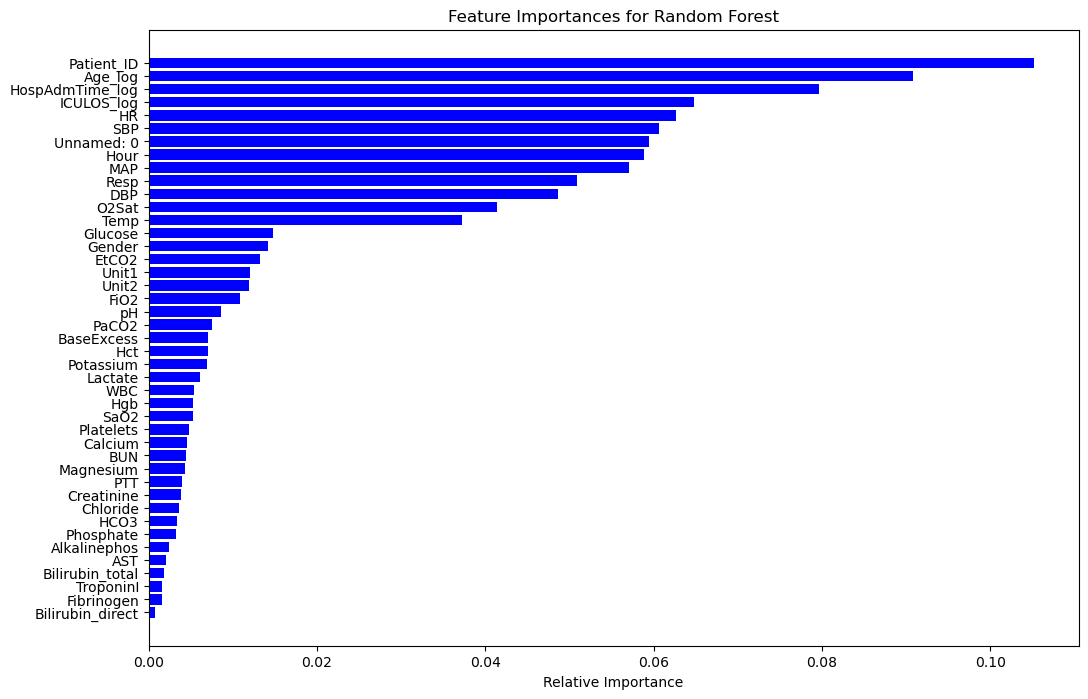

In [59]:
plt.figure(figsize=(12, 8))
plt.title('Feature Importances for Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [60]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [61]:
y_pred_gb = gb_model.predict(X_test)
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]

In [62]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)
classification_report_gb = classification_report(y_test, y_pred_gb)

In [63]:
print(f'Gradient Boosting Accuracy: {accuracy_gb}')
print(f'Gradient Boosting ROC AUC Score: {roc_auc_gb}')
print(f'Gradient Boosting Classification Report:\n{classification_report_gb}')

Gradient Boosting Accuracy: 0.9822317856475605
Gradient Boosting ROC AUC Score: 0.8023040104923179
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    304903
         1.0       0.62      0.01      0.02      5539

    accuracy                           0.98    310442
   macro avg       0.80      0.51      0.51    310442
weighted avg       0.98      0.98      0.97    310442



In [64]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [65]:
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

In [ ]:
best_gb_model = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_model.fit(X_train, y_train)

In [ ]:
y_pred_best_gb = best_gb_model.predict(X_test)
y_pred_prob_best_gb = best_gb_model.predict_proba(X_test)[:, 1]

In [ ]:
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
roc_auc_best_gb = roc_auc_score(y_test, y_pred_prob_best_gb)
classification_report_best_gb = classification_report(y_test, y_pred_best_gb)

In [ ]:
print(f'Optimized Gradient Boosting Accuracy: {accuracy_best_gb}')
print(f'Optimized Gradient Boosting ROC AUC Score: {roc_auc_best_gb}')
print(f'Optimized Gradient Boosting Classification Report:\n{classification_report_best_gb}')